In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Задание 3.1
Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.

In [6]:
img = cv2.imread('images/jaguar.jpg', 0)
imag = cv2.imread('images/jaguar.jpg', 0)
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

У функции findContours два возвращаемых значения: первое – контур, а второе – топологическая структура (иерархия). Контур (первое возвращаемое значение) – это список, в котором хранятся все контуры изображения. Каждый контур пред-
ставляет собой массив numpy, содержащий координаты точек границы объекта (x, y).

In [7]:
ar = cv2.contourArea(cnt)
print(f"Площадь: {ar}")

prm = cv2.arcLength(cnt,True)
print(f"Периметр: {prm}")

M = cv2.moments(cnt)
print(f"Моменты: {M}")

x,y,w,h = cv2.boundingRect(cnt)
print(f"{x}, {y}, Ширина: {h}, высота: {w}")

imag = cv2.rectangle(imag,(x,y),(x+w,y+h),(0,255,0),2)
cv2.imshow('Rectan', imag)
asprat = float(w) / h 
rectar = w * h
extent = float(ar)/rectar
eqdiam = np.sqrt(4 * ar / np.pi)
print(f"Отношение ширины к высоте: {asprat}, отношение s/(wh): {extent}")
print(f"Эквивалентный диаметр: {eqdiam}")

Площадь: 2344473.0
Периметр: 9215.81656563282
Моменты: {'m00': 2344473.0, 'm10': 1859361941.6666665, 'm01': 1881122050.8333333, 'm20': 1960771212768.8333, 'm11': 1479807802980.9165, 'm02': 1955727235207.0, 'm30': 2313898459600535.5, 'm21': 1548919845203393.2, 'm12': 1540345345381533.2, 'm03': 2283824240888970.5, 'mu20': 486142658668.0027, 'mu11': -12078326204.38379, 'mu02': 446381565569.7698, 'mu30': -12259139499061.5, 'mu21': -5175256276443.4375, 'mu12': 8673546258907.25, 'mu03': -1703483132929.5, 'nu20': 0.088444994777566, 'nu11': -0.002197436244322689, 'nu02': 0.08121117234145443, 'nu30': -0.0014566221108439407, 'nu21': -0.0006149202170452906, 'nu12': 0.0010305845088979734, 'nu03': -0.00020240663686588902}
0, 0, Ширина: 1564, высота: 1564
Отношение ширины к высоте: 1.0, отношение s/(wh): 0.9584550238420733
Эквивалентный диаметр: 1727.7371718996733


-1

# Задание 3.2
Используя изображение маски определить крайние точки, минимальное и максимальное значения и их координаты для бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью.

Пиксельные точки:
 []
Максимальное и минимальное значения и их координаты:0.0, 0.0, (-1, -1), (-1, -1)
Крайние точки:(0, 0), (1563, 0), (0, 0), (1563, 1563)
Средняя интенсивность: (0.0, 0.0, 0.0, 0.0)
Ориентация: 98.41520690917969


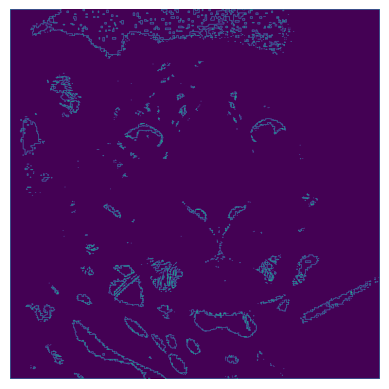

In [26]:
img = cv2.imread('images/jaguar.jpg', 0)
imag = cv2.imread('images/jaguar.jpg', 0)
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

img_contours = np.uint8(np.zeros((img.shape[0],img.shape[1])))
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

mask = np.zeros(img.shape, np.uint8)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)
meanv = cv2.mean(img,mask = mask)

print(f"Пиксельные точки:\n {pixpoin}")
print("Максимальное и минимальное значения и их координаты:"
      f"{minv}, {maxv}, {minl}, {maxl}")
print(f"Крайние точки:{leftmost}, {rightmost}, {topmost}, {bottommost}")
print(f"Средняя интенсивность: {meanv}")
print(f"Ориентация: {ang}")

plt.axis("off")
plt.imshow(img_contours)